<a href="https://colab.research.google.com/github/joaopcnogueira/colab-notebooks/blob/main/ABC_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Carregando os Dados

In [52]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/online_retail.xlsx')

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Criando coluna TotalPrice

In [55]:
df = df.assign(TotalPrice = lambda x: x['Quantity'] * x['UnitPrice'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# Sumarizando por Item

In [56]:
df_revenue_by_item = df \
  .groupby('Description') \
  .agg(Revenue = ('TotalPrice', 'sum')) \
  .reset_index() \
  .sort_values('Revenue', ascending=False) \
  .query('Revenue >= 0') \
  .reset_index() \
  .drop('index', axis=1)

In [57]:
df_revenue_by_item

,Description,Revenue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
...,...,...
4192,Not rcvd in 10/11/2010 delivery,0.00
4193,Sale error,0.00
4194,Printing smudges/thrown away,0.00
4195,OOPS ! adjustment,0.00


# Análise ABC

In [ ]:
!pip install abc-analysis

In [12]:
from abc_analysis import abc_analysis, abc_plot

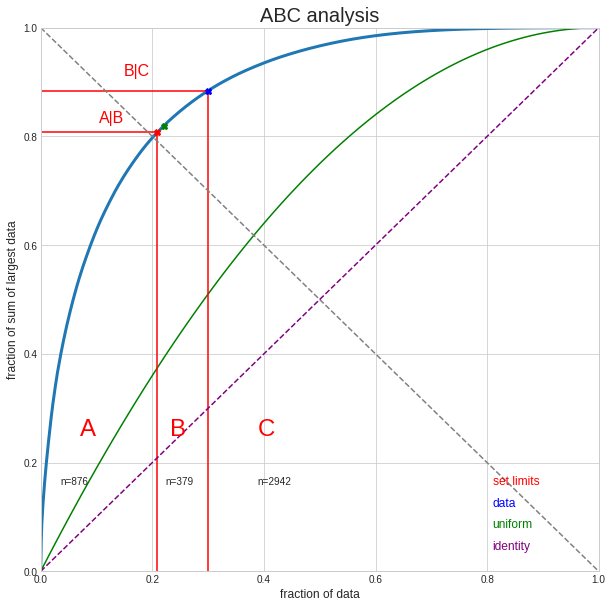

In [60]:
abc = abc_analysis(df_revenue_by_item['Revenue'], boolPlotResult=True, fltSize=10)

Em torno de 20% dos items correspondem a 80% da receita. Esses itens fazem parte do cluster A.

In [62]:
# Index position of A, B, and C videos
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

# New column indicating A, B or C
cond_list = [df_revenue_by_item.index.isin(a_index), 
             df_revenue_by_item.index.isin(b_index), 
             df_revenue_by_item.index.isin(c_index)]
choice_list = ['A', 'B', 'C']

df_revenue_by_item['cluster_abc'] = np.select(cond_list, choice_list)
df_revenue_by_item.sort_values('Revenue', ascending=False)

,Description,Revenue,cluster_abc
0,DOTCOM POSTAGE,206245.48,A
1,REGENCY CAKESTAND 3 TIER,164762.19,A
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47,A
3,PARTY BUNTING,98302.98,A
4,JUMBO BAG RED RETROSPOT,92356.03,A
...,...,...,...
4075,wrongly sold (22719) barcode,0.00,C
4076,dotcom sold sets,0.00,C
4077,wrongly marked. 23343 in box,0.00,C
4078,wrongly marked carton 22804,0.00,C


In [64]:
df_revenue_by_item['cluster_abc'].value_counts().sort_index()

A     876
B     379
C    2942
Name: cluster_abc, dtype: int64

In [65]:
df_revenue_by_item['cluster_abc'].value_counts(1).sort_index()

A    0.208721
B    0.090303
C    0.700977
Name: cluster_abc, dtype: float64

In [68]:
df_revenue_by_item.query('cluster_abc == "A"').sort_values('Revenue', ascending=False)

,Description,Revenue,cluster_abc
0,DOTCOM POSTAGE,206245.48,A
1,REGENCY CAKESTAND 3 TIER,164762.19,A
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47,A
3,PARTY BUNTING,98302.98,A
4,JUMBO BAG RED RETROSPOT,92356.03,A
...,...,...,...
871,GREEN GIANT GARDEN THERMOMETER,2621.41,A
872,PACK OF 6 SWEETIE GIFT BOXES,2618.75,A
873,CHEST OF DRAWERS GINGHAM HEART,2614.06,A
874,RECYCLED ACAPULCO MAT LAVENDER,2613.18,A
